# Dependencies

In [1]:
import pandas as pd  #for data analysis
import seaborn as sns  #library of visualization
import matplotlib.pyplot as plt #library for visualization

# Reading the Dataset

In [2]:
df=pd.read_csv('listings.csv')

# Shape of the Dataset

In [3]:
df.shape

(2626, 18)

# Statistical Properties of the Data

In [4]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.626000e+03,2.626000e+03,0.0,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2487.000000,2626.000000,2626.000000,2626.000000,0.0
mean,3.332476e+07,1.194922e+08,NaN,28793.124905,35.577275,-82.558490,182.612338,5.211729,88.066641,2.954576,8.447829,202.790175,27.699162,NaN
std,1.505074e+07,1.151177e+08,NaN,29.651121,0.047860,0.047481,192.963345,13.528865,110.543305,2.403260,22.066612,125.692007,29.218105,NaN
min,1.080610e+05,6.266700e+04,NaN,28704.000000,35.423420,-82.691050,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.130107e+07,2.208548e+07,NaN,28801.000000,35.563905,-82.592248,93.000000,1.000000,13.000000,1.140000,1.000000,79.000000,4.000000,NaN
50%,3.565181e+07,8.691098e+07,NaN,28804.000000,35.588210,-82.557250,134.000000,2.000000,50.500000,2.370000,1.000000,210.000000,20.000000,NaN
75%,4.702919e+07,1.744576e+08,NaN,28806.000000,35.605145,-82.525500,218.750000,2.000000,123.000000,4.045000,4.000000,332.000000,41.000000,NaN
max,5.381698e+07,4.358448e+08,NaN,28806.000000,35.656090,-82.459420,6000.000000,365.000000,982.000000,15.560000,108.000000,365.000000,238.000000,NaN


# Features Present in the Data

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

# Checking Null Values

### Percentages of Null Values

In [6]:
(df.isnull().sum()/df.shape[0])*100

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                         5.293222
reviews_per_month                   5.293222
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

# First Attempt to Display Longitudes and Latitudes

In [7]:
def map(longitude,latitude):
    plt.scatter(x=longitude, y=latitude)
    plt.title("Geographical Locations")
    plt.show()

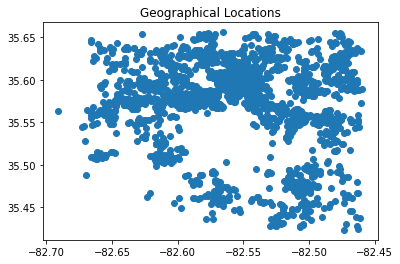

In [8]:
map(df['longitude'],df['latitude'])

# Second Attempt to Display Longitudes and Latitudes

### note-> use python 3.6 or lower

In [9]:
def map2(longitude,latitude):
    from shapely.geometry import Point
    import geopandas as gpd
    from geopandas import GeoDataFrame

    geometry = [Point(xy) for xy in zip(longitude,latitude)]
    gdf = GeoDataFrame(df, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
    plt.title("Geographic Locations")
    

In [10]:
map2(df['longitude'],df['latitude'])

ModuleNotFoundError: No module named 'shapely'

In [ ]:
def Host_Names(df):
    fig,ax = plt.subplots(figsize=(12,4))
    sns.histplot(data=df, x='host_name',shrink=.9,bins=30,color='green')
#     ax.set(xlim=(0, 900))
    for container in ax.containers:
        ax.bar_label(container)
    ax.set(title="Price Ranges")
    plt.show()
Host_Names(df)

# Price Distribution

In [11]:
def price_distribution(price):
    sns.set(rc = {'figure.figsize':(16,5)})
    plt.title("Price Values Distribution")
    ax = sns.boxplot(x="price",data=df)
#     ax = sns.swarmplot(x="price",data=df, color=".25")

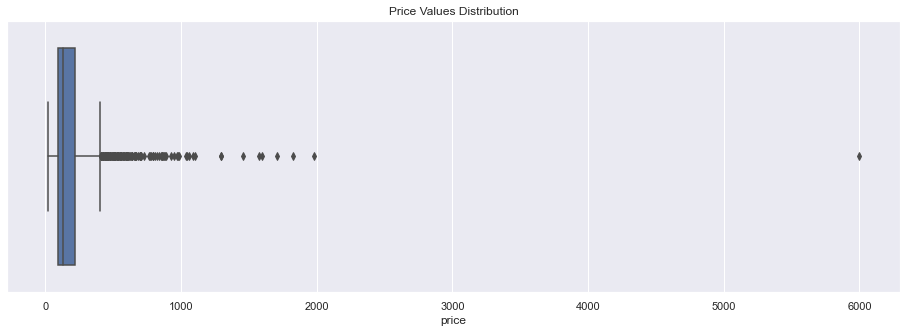

In [12]:
price_distribution(df)

# Density Curve

In [13]:
def den_curve(df):
    sns.kdeplot(data=df, x="price")
    plt.title("Price Values Distribution")
    plt.show()

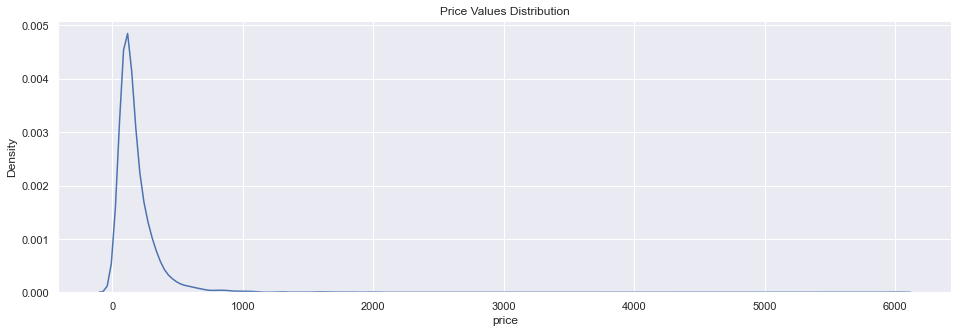

In [14]:
den_curve(df)

Price feature has lot of ir-regular values that are usally called outliers. There is some disorder at the peak and at the right end of the curve that shows data is not normally distributed but rightly skewed.

In [15]:
def price_ranges(df):
    fig,ax = plt.subplots(figsize=(12,4))
    sns.histplot(data=df, x='price',shrink=.9,bins=30,color='green')
    ax.set(xlim=(0, 900))
    for container in ax.containers:
        ax.bar_label(container)
    ax.set(title="Price Ranges")
    plt.show()

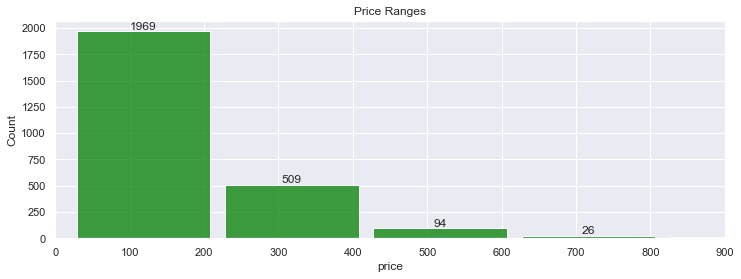

In [16]:
price_ranges(df)

# Apartments Availability

In [17]:
def aprtment_avail(df):
    sns.set(rc = {'figure.figsize':(8,5)})
    ax=sns.histplot(data=df, x='availability_365',shrink=.8,bins=3,color='red')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Apartments Availability over 365 Days")
    plt.show()

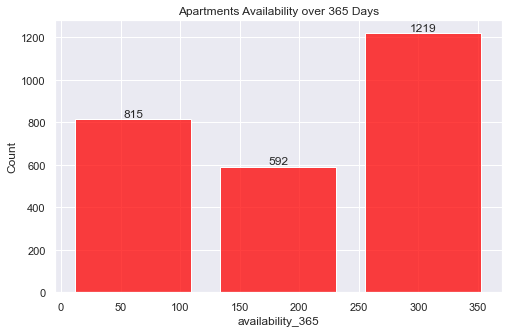

In [18]:
aprtment_avail(df)

# Minimum Nights

In [19]:
def min_nights(df):
    sns.set(rc = {'figure.figsize':(8,5)})
    ax=sns.histplot(data=df, x='minimum_nights',shrink=.8,bins=2,color='blue')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Apartments Availability over 365 Days")
    plt.show()

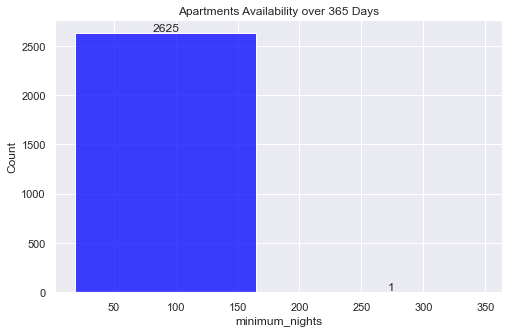

In [20]:
min_nights(df)

# No. of Reviews

In [21]:
def no_of_reviews(df):
    sns.set(rc = {'figure.figsize':(8,5)})
    ax=sns.histplot(data=df, x='number_of_reviews',shrink=.8,bins=1,color='purple')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Reviews of the Apartments")
    plt.show()

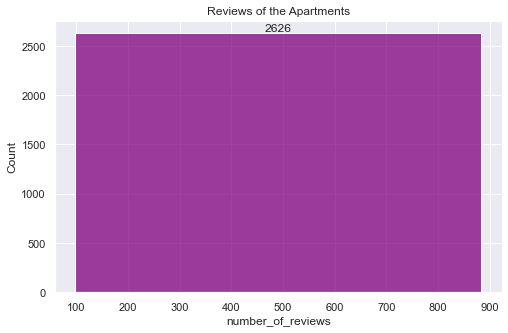

In [22]:
no_of_reviews(df)

# Reviews Per Month

In [23]:
def reviews_per_month(df):
    sns.histplot(data=df, x='reviews_per_month',shrink=.8,bins=3)
    plt.title("Reviews Per Month")
    plt.show()

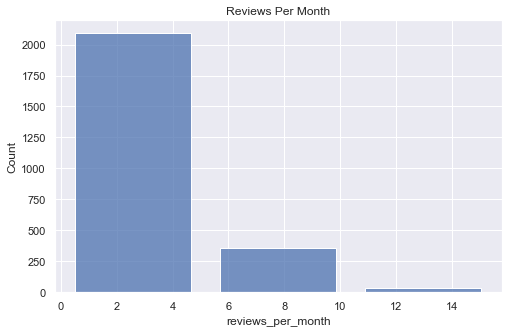

In [24]:
reviews_per_month(df)

# Room Types

In [25]:
def room_types(df):
    plt.figure(figsize=(10, 10))
    df.room_type.value_counts().plot.pie()
    plt.show()

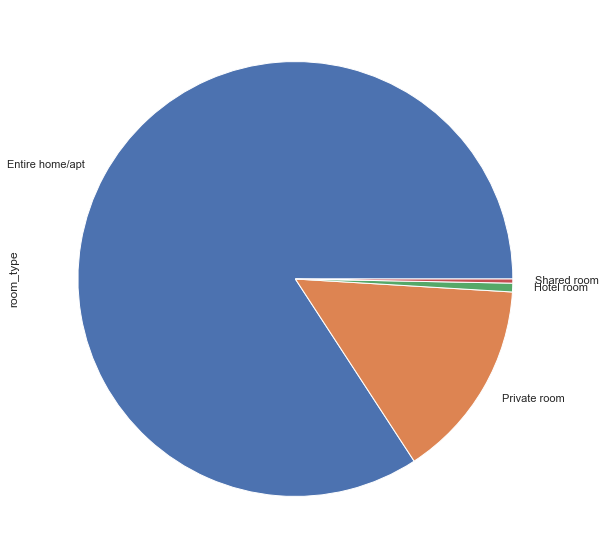

In [26]:
room_types(df)

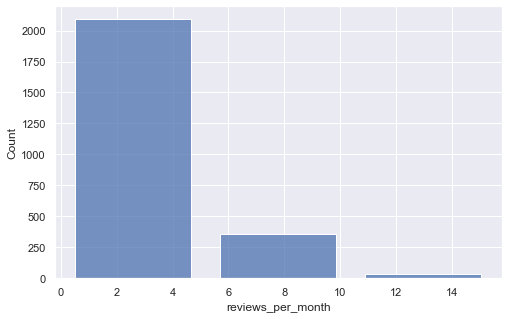

In [27]:
sns.histplot(data=df, x='reviews_per_month',shrink=.8,bins=3)
plt.show()

# Count of Host Listing

In [28]:
def host_listings_count(df):
    sns.set(rc = {'figure.figsize':(8,5)})
    ax=sns.histplot(data=df, x='calculated_host_listings_count',shrink=.8,bins=5,color='violet')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Reviews of the Apartments")
    plt.show()

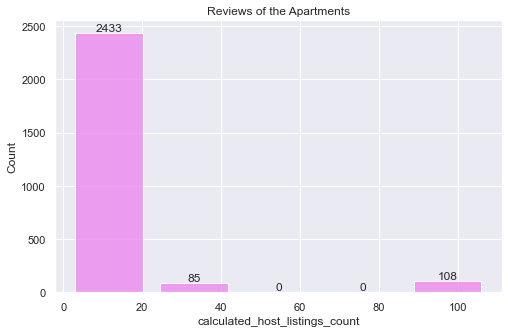

In [29]:
host_listings_count(df)